In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline

In [2]:
temp1 = [ 290., 292.5, 295., 297.5, 300., 302.5, 305., 307.5, 310., ]
stemp1 = [ "290", "292.5", "295", "297.5", "300", "302.5", "305", "307.5", "310", ]

t = len( temp1 )

In [12]:
#Small domain PDFs
#Find heights of maximum condensation rate in each simulation:
qc = np.load( "data/small_domain_micro_con.dat") #condensation rate

h = np.zeros( ( 3, 9))
for j in range( 3 ):
    for i in range( 9 ):
        for k in range( 64 ):
            if qc[j, i, k] == max( qc[j, i] ):
                h[j, i] = k
                break

In [7]:
#Now make bins:
bins = np.arange( 0., 5.1, 0.1 )
plot_bins = (bins[1:] + bins[:len(bins) - 1] ) / 2.
histogram = np.zeros( ( ( 3, 9, len(bins) - 1 ) ) )


In [14]:
#Have to loop through 3D output files to get here. Did this as:
#qc = f1.variables['QN'][0, h[j, i], :, :]

#d1, d2 = np.shape( qc )
#qc = np.reshape( qc, (d1 * d2 ) )
#qc = np.ma.masked_where( qc < bins[1], qc )

#pdf, bins = np.histogram( qc.compressed(), bins, density = False) 
#histogram[j, i] += pdf.astype(float) / float(num)
#histogram[j, i] *= 100. / 96 ** 2 convert to fractional area
    
#where f1 is a 3D output file and num is the total number of files being looped over

histogram = np.load( "data/small_domain_PDFs.dat")

In [15]:
def make_axis( ax ):

	ax.tick_params( axis = 'x', which = 'both', bottom="on", top = "off", labelbottom = "on", direction = 'out')                  
	ax.tick_params( axis = 'y', which = 'both', bottom="off", top="off",  labelbottom="off", left="on", right="off", labelleft="on", direction = 'out')                                                                                          

	ax.tick_params(length = 5, which = 'both')

	ax.spines["top"].set_visible(False)    
	ax.spines["right"].set_visible(False) 

	plt.xlim([0., 5])
	plt.xlabel( "$q_{c}$ [g kg$^{-1}$]" )

	plt.ylabel("% of domain")
	plt.ylim([10. ** -5., 1.])

	majorLocator = MultipleLocator(1)
	minorLocator = MultipleLocator(0.5)
	ax.xaxis.set_major_locator(majorLocator)
	ax.xaxis.set_minor_locator(minorLocator)

	return ax

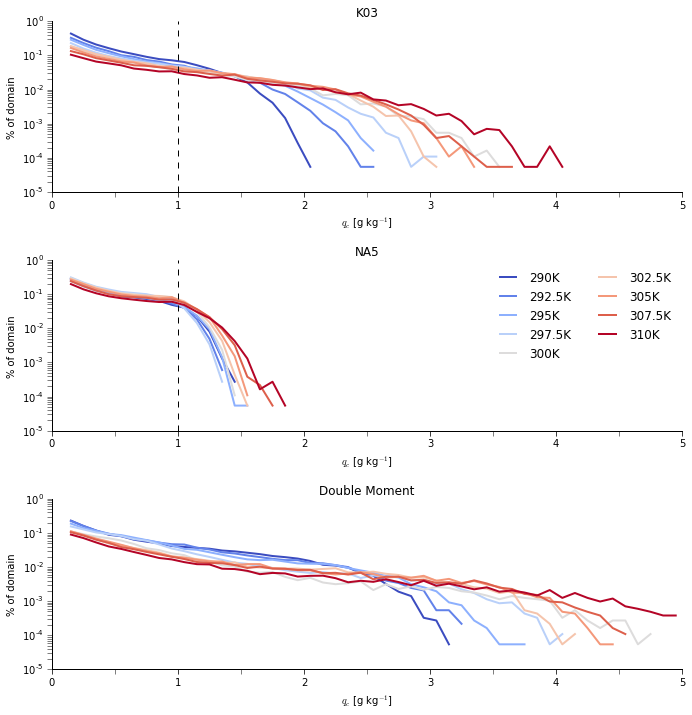

In [16]:
fig = plt.figure( figsize = (10, 10) )
plt.subplots_adjust(left = 0.075, right = 0.95, bottom = 0.07, top = 0.97, hspace = 0.4, wspace = 0.3)

titles = ["K03", "NA5", "Double Moment"]
          
    
for j in range( 3 ):
    ax1 = plt.subplot(3, 1, j + 1 )
    plt.title( titles[j] )
    ax1.set_color_cycle([plt.cm.coolwarm(i) for i in np.linspace(0, 1, t)])

    for i in range( t ):
        plt.semilogy( plot_bins[1:], histogram[j, i, 1:],  label = stemp1[i] + 'K', linewidth = 2. )
    if j == 1:
        plt.legend( loc = 'upper right', ncol = 2, frameon = False )
    make_axis( ax1 )
    if j < 2:
        plt.axvline( x = 1., color = 'k', linestyle = '--' )

plt.show()

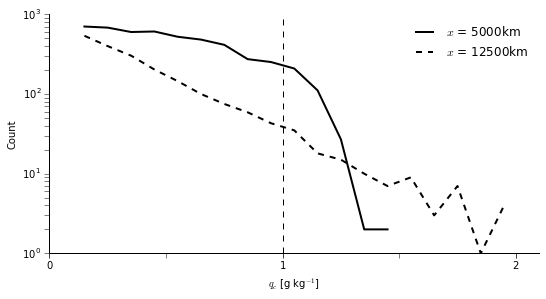

In [17]:
#The PDFs for the 2D simulations are calculated in the same way, but here we use two points, one in the cold pool and the point in the center of the domain:
#x1 = 0
#for i in range( len( x ) ):
#if x[i] >= 5000000. and x1 == 0:
#        x1 = i
#    if x[i] >= max( x ) / 2:
#        x2 = i
#        break
#We then similarly calculate the heights of maximum condensation rate and plot

pdf = np.load( "data/2D_walker_x1_pdf.dat")
pdf2 = np.load( "data/2D_walker_x2_pdf.dat")

fig = plt.figure( figsize = (8, 4) )
plt.subplots_adjust(left = 0.1, right = 0.95, bottom = 0.14, top = 0.97, hspace = 0.3, wspace = 0.3)

ax = plt.subplot(1, 1, 1)
plt.semilogy( plot_bins[1:], pdf[1:], 'k', linewidth = 2. )
plt.semilogy( plot_bins[1:], pdf2[1:], 'k--', linewidth = 2. )

plt.axvline( x = 1., color = 'k', linestyle = '--' )

plt.legend( ["$x$ = 5000km", "$x$ = 12500km"], loc = 'upper right', ncol = 1, frameon = False )

ax.tick_params( axis = 'x', which = 'both', bottom="on", top = "off", labelbottom = "on", direction = 'out')                  
ax.tick_params( axis = 'y', which = 'both', bottom="off", top="off",  labelbottom="off", left="on", right="off", labelleft="on", direction = 'out')                                                                                          

ax.tick_params(length = 5, which = 'both')

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False) 

plt.xlim([0., 2.1])

plt.xlabel( "$q_{c}$ [g kg$^{-1}$]" )
plt.ylabel("Count")

majorLocator = MultipleLocator(1)
minorLocator = MultipleLocator(0.5)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)
plt.show()
